In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.style.use("dark_background")
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
g = cogsworth.sfh.Wagg2022(size=500000)

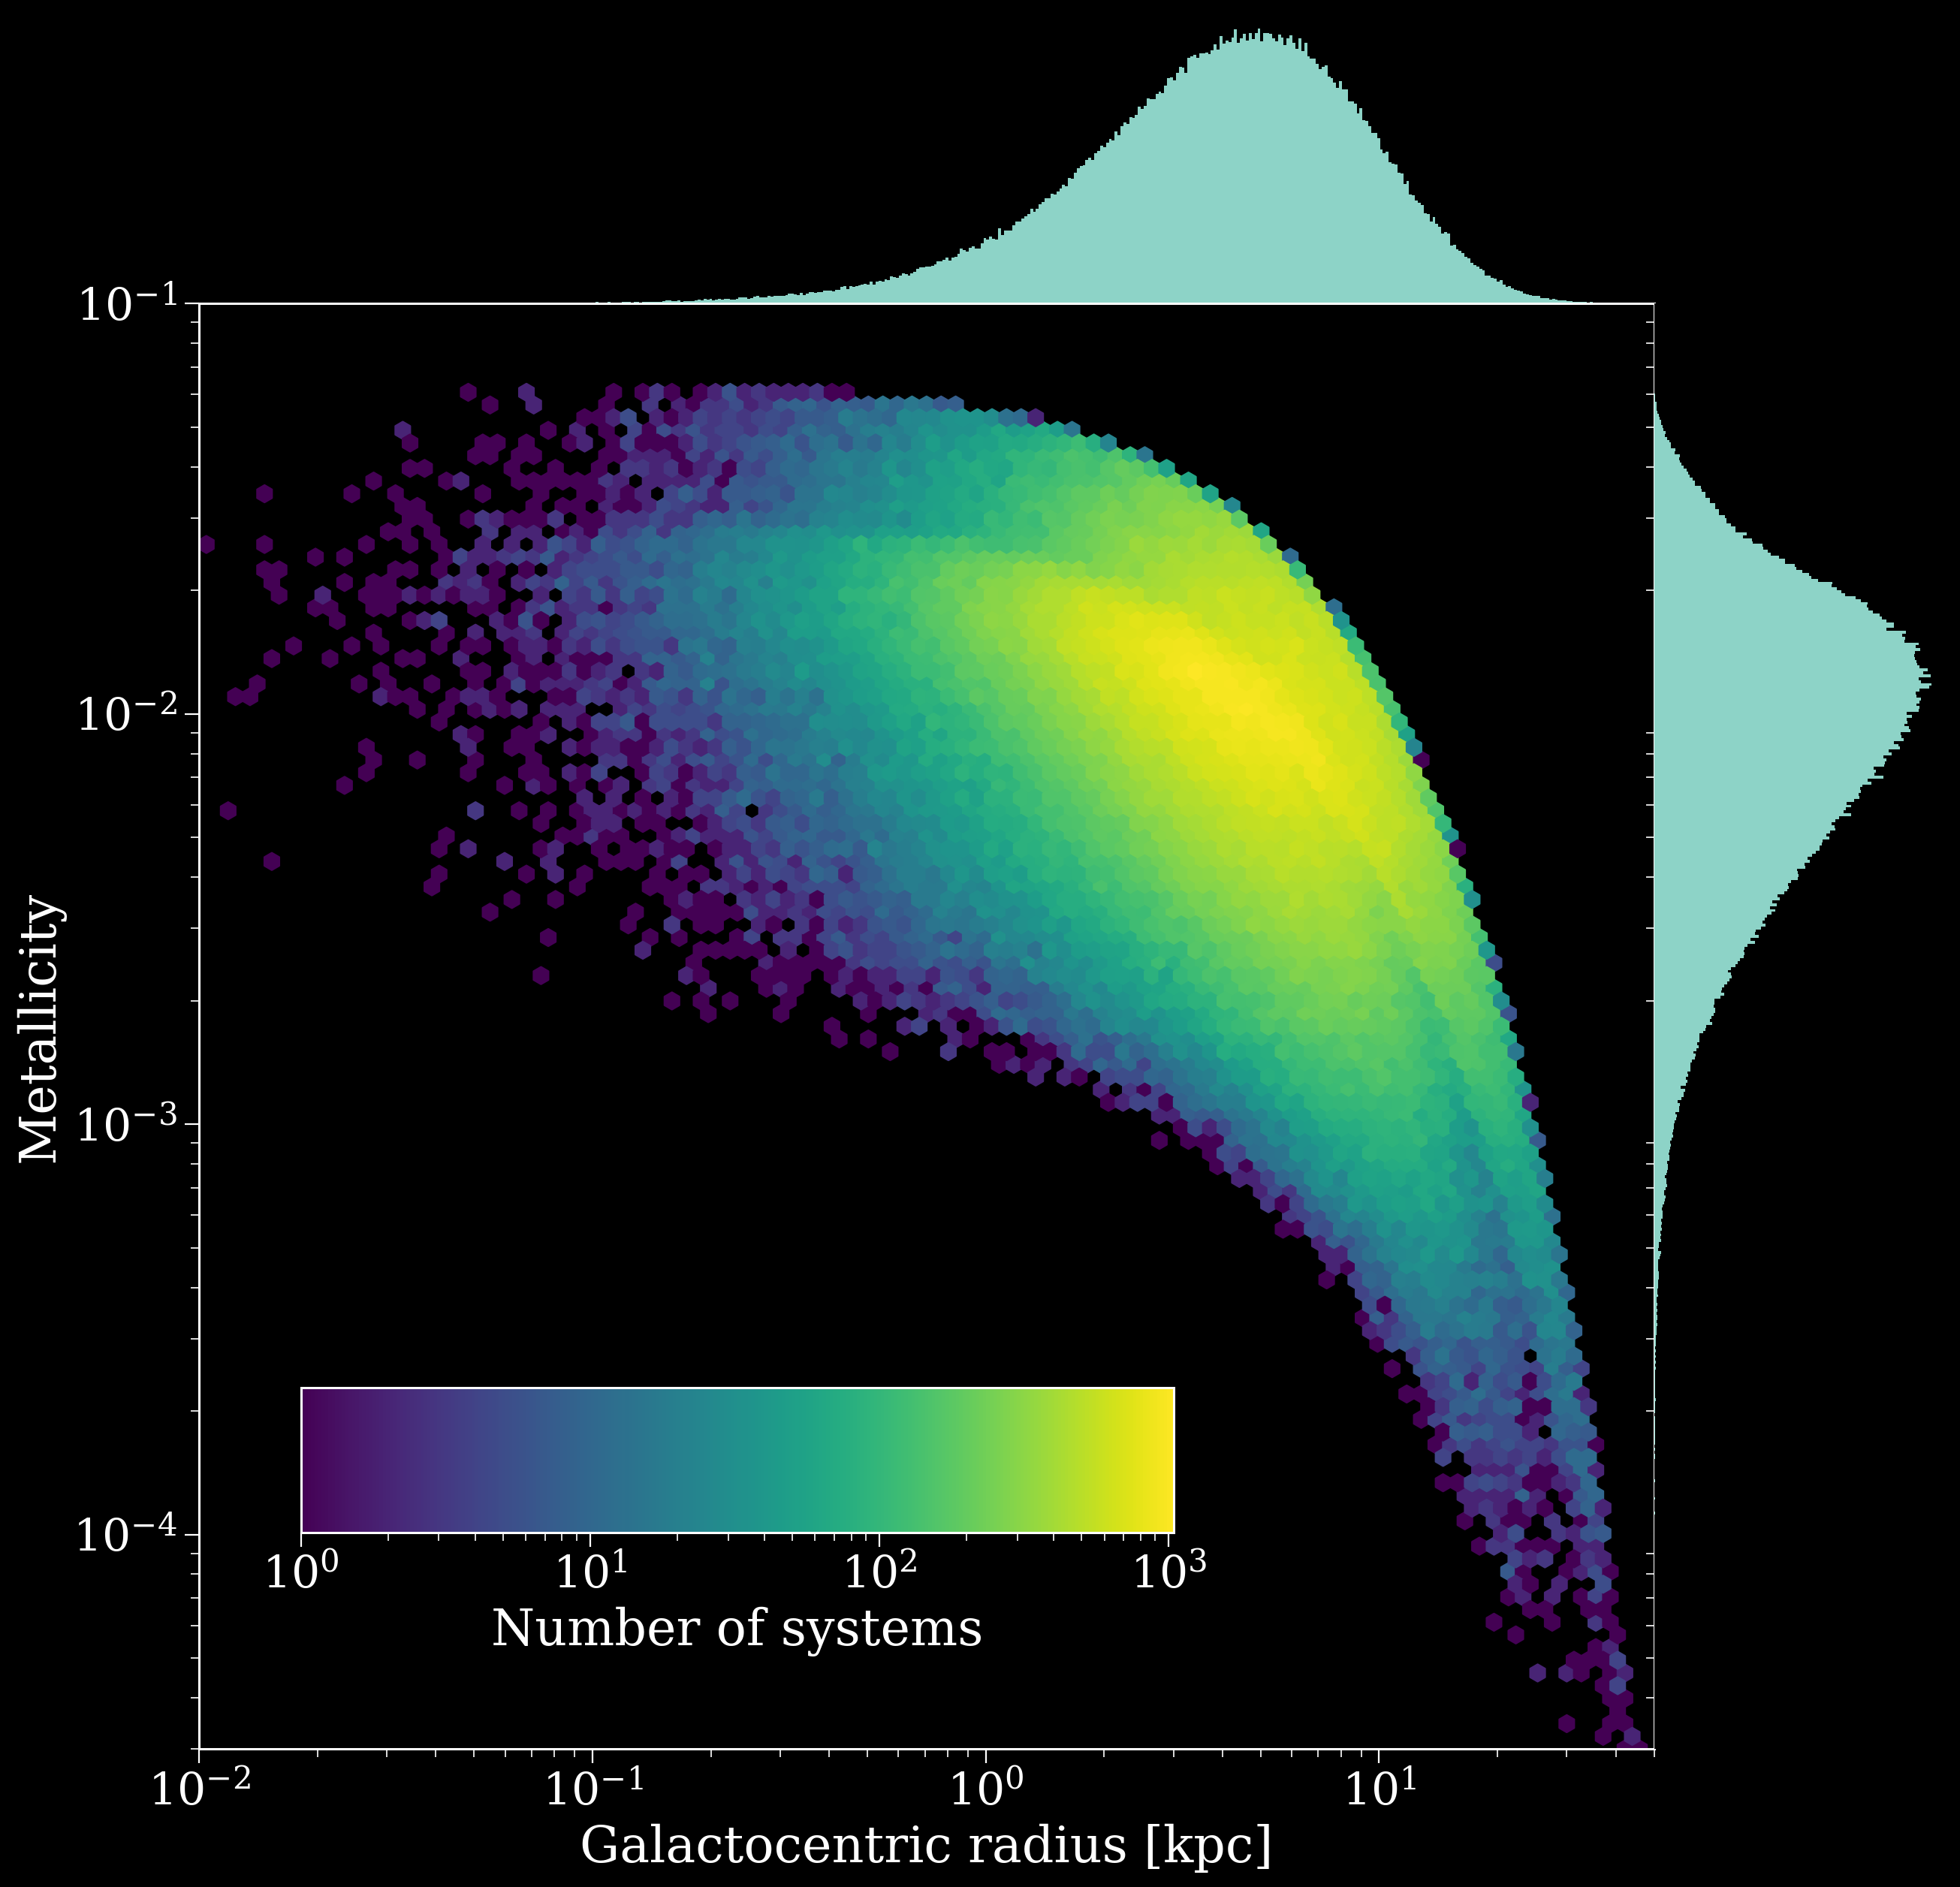

In [4]:
# create a 2x2 plot with no space between axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15),
                         gridspec_kw={"width_ratios": [5, 1],
                                      "height_ratios": [1, 5]})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# hide the top right panel
axes[0, 1].axis("off")

# fix the x and y lims
xlims = (1e-2, 50)
ylims = (3e-5, 1e-1)

# add histograms to each axis
axes[0, 0].hist(g.rho.value, np.geomspace(*xlims, 500))
hexbin = axes[1, 0].hexbin(x=g.rho.value, y=g.Z.value, bins="log",
                           xscale="log", yscale="log",
                           extent=np.log10((*xlims, *ylims)))
axes[1, 1].hist(g.Z.value, np.geomspace(*ylims, 500), orientation="horizontal")

# create an inset axis and add a colourbar
inset_ax = axes[1, 0].inset_axes([0.07, 0.15, 0.6, 0.1])
fig.colorbar(hexbin, cax=inset_ax, orientation="horizontal",
             label="Number of systems")

# set the axes limits, scales and labels
axes[0, 0].set(xlim=xlims, xscale="log")
axes[1, 0].set(xlim=xlims, ylim=ylims, xlabel="Galactocentric radius [kpc]", ylabel="Metallicity")
axes[1, 1].set(ylim=ylims, yscale="log")

# for the marginals hide the ticks and spines
for ax in [axes[0, 0], axes[1, 1]]:
    ax.set(yticks=[], xticks=[])
    ax.spines[:].set_visible(False)
    
plt.show()

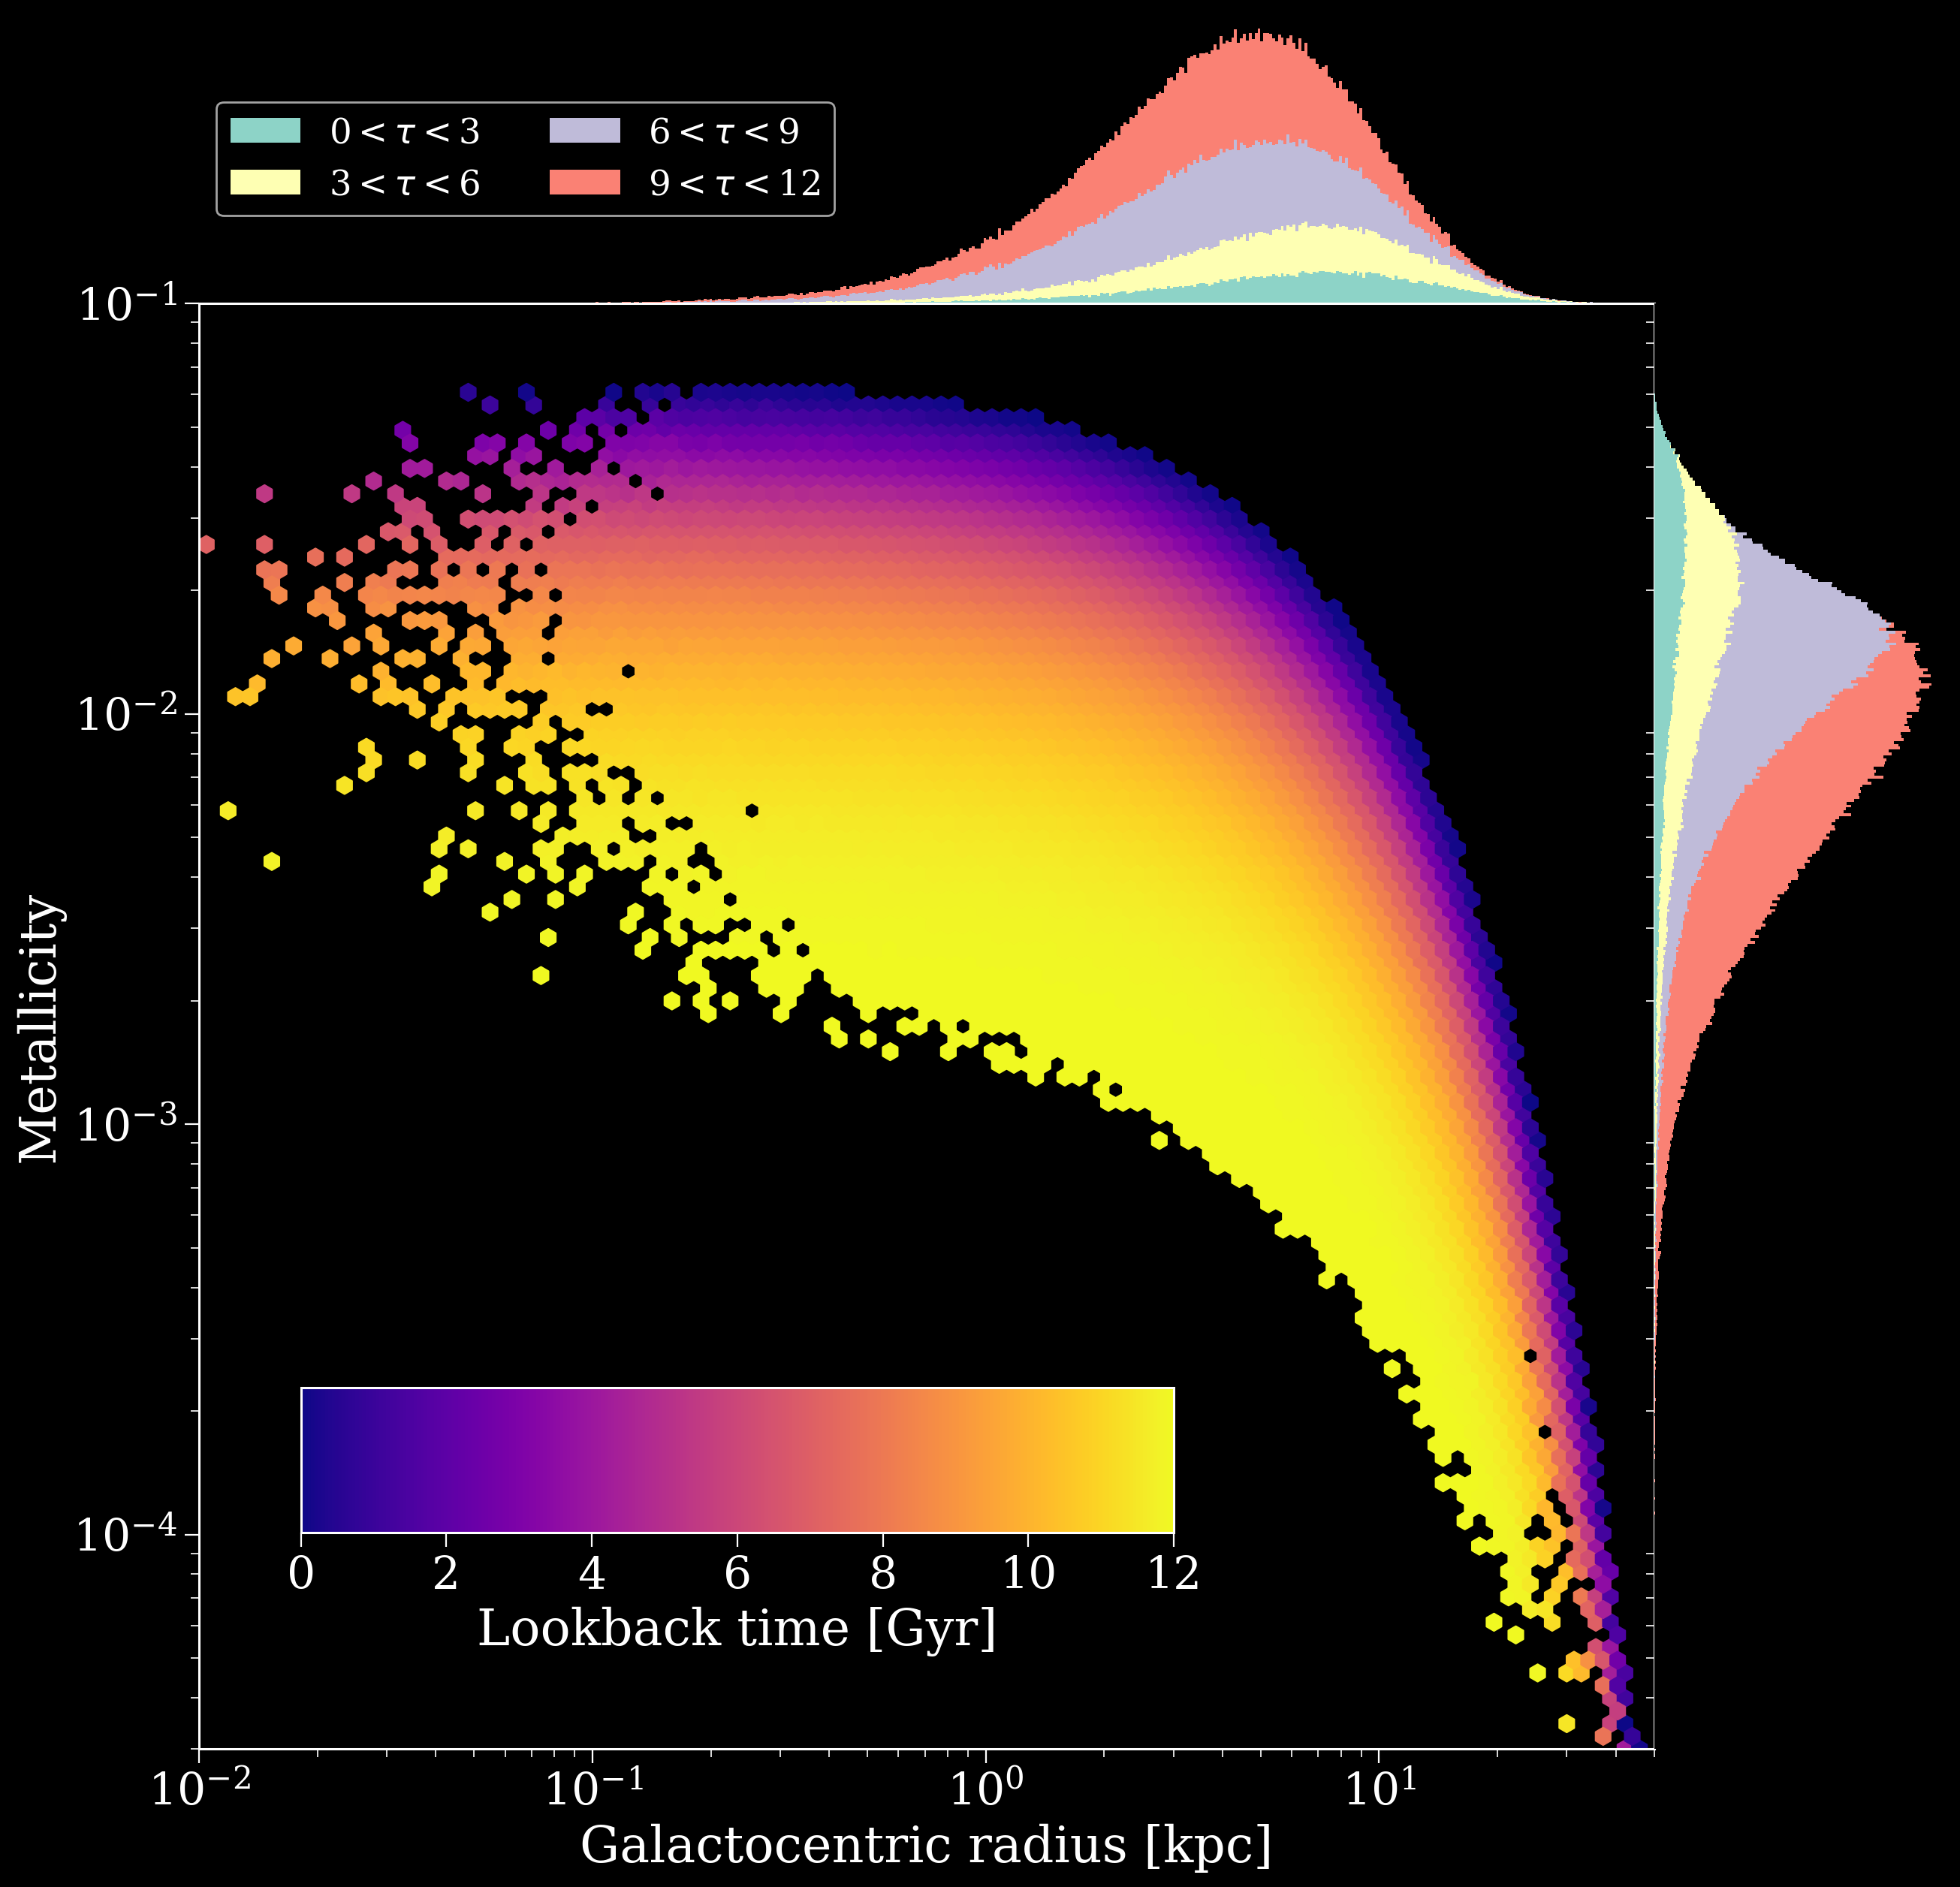

In [5]:
# create a 2x2 plot with no space between axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15),
                         gridspec_kw={"width_ratios": [5, 1],
                                      "height_ratios": [1, 5]})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# hide the top right panel
axes[0, 1].axis("off")

# fix the x and y lims
xlims = (1e-2, 50)
ylims = (3e-5, 1e-1)

######################
## edited code here ##
######################

time_bins = [(i, i + 3) for i in range(0, 12, 3)] * u.Gyr
    
# add histograms to each axis
axes[0, 0].hist([g.rho.value[(g.tau >= low) & (g.tau < high)]
                 for low, high in time_bins],
                np.geomspace(*xlims, 500), stacked=True,
                label=[f'{low.value:1.0f}' + r'$< \tau <$' + f'{high.value:1.0f}'
                       for low, high in time_bins])
axes[0, 0].legend(loc="center left", ncol=2, fontsize=0.7*fs)
hexbin = axes[1, 0].hexbin(x=g.rho.value, y=g.Z.value, C=g.tau.value,
                           xscale="log", yscale="log", vmin=0, vmax=12,
                           extent=np.log10((*xlims, *ylims)), cmap="plasma")
axes[1, 1].hist([g.Z.value[(g.tau >= low) & (g.tau < high)]
                 for low, high in time_bins],
                np.geomspace(*ylims, 500), orientation="horizontal", stacked=True)

# create an inset axis and add a colourbar
inset_ax = axes[1, 0].inset_axes([0.07, 0.15, 0.6, 0.1])
fig.colorbar(hexbin, cax=inset_ax, orientation="horizontal",
             label="Lookback time [Gyr]")

######################
## edited code ends ##
######################

# set the axes limits, scales and labels
axes[0, 0].set(xlim=xlims, xscale="log")
axes[1, 0].set(xlim=xlims, ylim=ylims, xlabel="Galactocentric radius [kpc]", ylabel="Metallicity")
axes[1, 1].set(ylim=ylims, yscale="log")

# for the marginals hide the ticks and spines
for ax in [axes[0, 0], axes[1, 1]]:
    ax.set(yticks=[], xticks=[])
    ax.spines[:].set_visible(False)
    
plt.show()

In [6]:
g.x, g.y, g.z, g.tau, g.Z

(<Quantity [-3.03599833,  1.30259076, -1.90626244, ..., -3.93896304,
             3.2041407 , -1.06661056] kpc>,
 <Quantity [ 3.65423384, -6.50176864,  0.05603742, ...,  0.84694463,
            -2.51188551, -0.99758462] kpc>,
 <Quantity [ 0.47126439,  0.00138998, -0.2753657 , ...,  1.1649711 ,
             0.43546093, -0.28816607] kpc>,
 <Quantity [ 6.8167817 ,  4.54907808,  7.78556202, ...,  9.40653456,
            10.78893901,  9.07892622] Gyr>,
 <Quantity [0.01203845, 0.01222697, 0.01646416, ..., 0.00782989, 0.00475806,
            0.01331419]>)

In [7]:
g.rho, g.phi

(<Quantity [4.75086422, 6.63096812, 1.90708591, ..., 4.02898809, 4.07137402,
            1.46042225] kpc>,
 <Quantity [ 2.26404751, -1.37306996,  3.11220463, ...,  2.9298001 ,
            -0.66487734, -2.38962167] rad>)

In [8]:
# a new class based on Wagg2022
class FixedMetallicity(cogsworth.sfh.Wagg2022):
    
    # an initialisation function that requires a size and fixed metallicity
    # all other keyword arguments are based to the Wagg2022 init function
    def __init__(self, size, fixed_Z, **kwargs):
        self.fixed_Z = fixed_Z
        super().__init__(size=size, **kwargs)
    
    # redefine the metallicity function to just return an array of ``fixed_Z``
    def get_metallicity(self):
        return np.repeat(self.fixed_Z, self.size)

In [9]:
g_fixed_Z = FixedMetallicity(size=10000, fixed_Z=0.02)
g_fixed_Z.Z

array([0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02])

In [10]:
# a new class based on Wagg2022
class YoungBulge(cogsworth.sfh.Wagg2022):
    # redefine the draw_lookback_time function
    def draw_lookback_times(self, size, component):
        # for the bulge, change to a uniform distribution in recent years
        if component == "bulge":
            return np.random.uniform(0, 1, size) * u.Gyr
        
        # otherwise, do whatever Wagg2022 does
        else:
            return super().draw_lookback_times(size=size, component=component)

In [11]:
g_young_bulge = YoungBulge(500000)

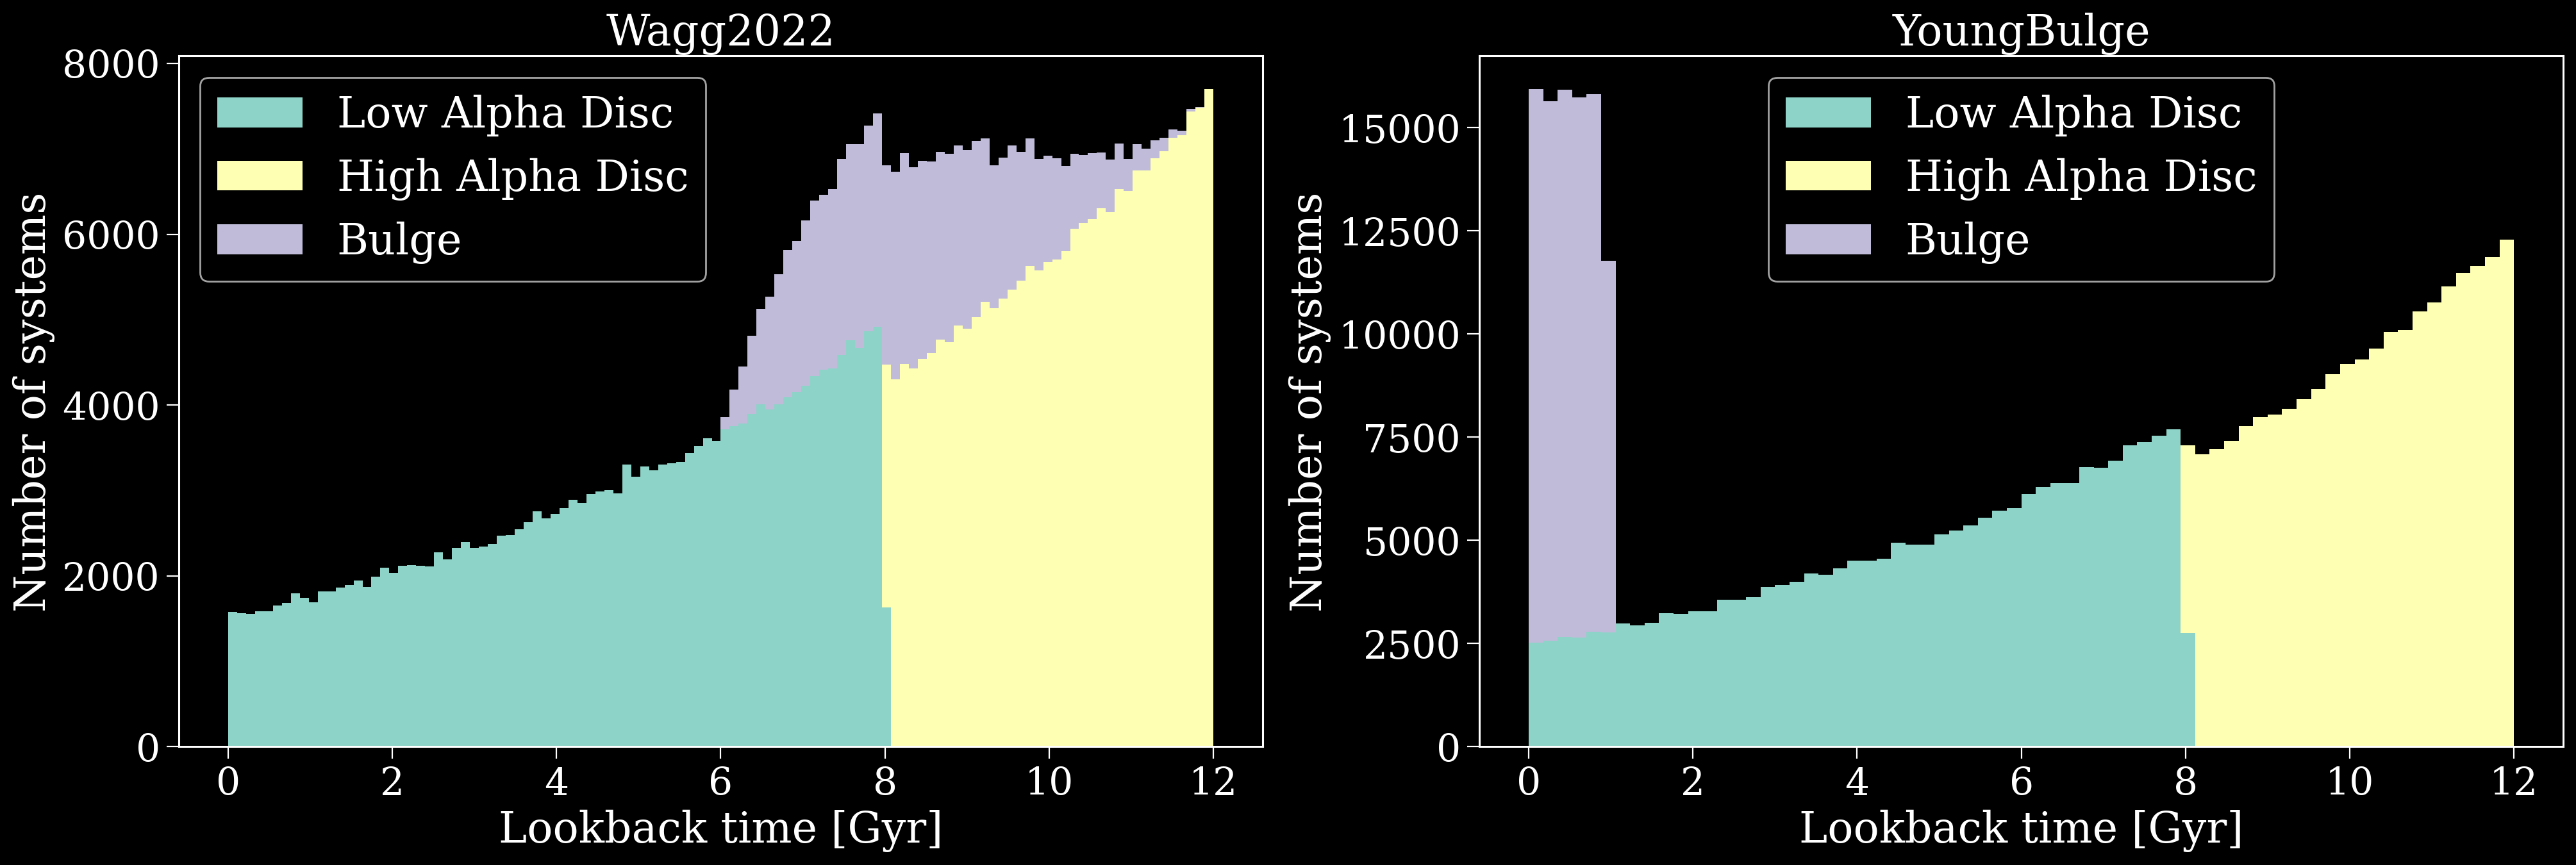

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(24, 7))

for ax, mod in zip(axes, [g, g_young_bulge]):
    ax.hist([mod.tau.value[mod.which_comp == comp] for comp in mod.components],
            label=[comp.replace("_", " ").title() for comp in mod.components],
            stacked=True, bins="fd")
    ax.legend()
    ax.set_title(mod.__class__.__name__, fontsize=fs)
    ax.set(xlabel="Lookback time [Gyr]", ylabel="Number of systems")
plt.show()

In [14]:
class TheCube(cogsworth.sfh.StarFormationHistory):
    def __init__(self, size, components=None, 
                 component_masses=None, immediately_sample=True):
        super().__init__(size=size, components=components,
                         component_masses=component_masses,
                         immediately_sample=immediately_sample)
        
    def sample(self):
        self.draw_lookback_times()
        self.draw_positions()
        self.get_metallicity()
        self._which_comp = np.repeat("CUBE", self.size)
        
    def draw_lookback_times(self):
        self._tau = np.repeat(42, self.size) * u.Myr
    
    def draw_positions(self):
        self._x = np.random.uniform(-30, 30, self.size) * u.kpc
        self._y = np.random.uniform(-30, 30, self.size) * u.kpc
        self._z = np.random.uniform(-30, 30, self.size) * u.kpc
        
    def get_metallicity(self):
        nonsense = np.abs(self._x * self._y * self._z)
        self._Z = (nonsense - nonsense.min()) / nonsense.max()

In [15]:
g_cube = TheCube(500000)

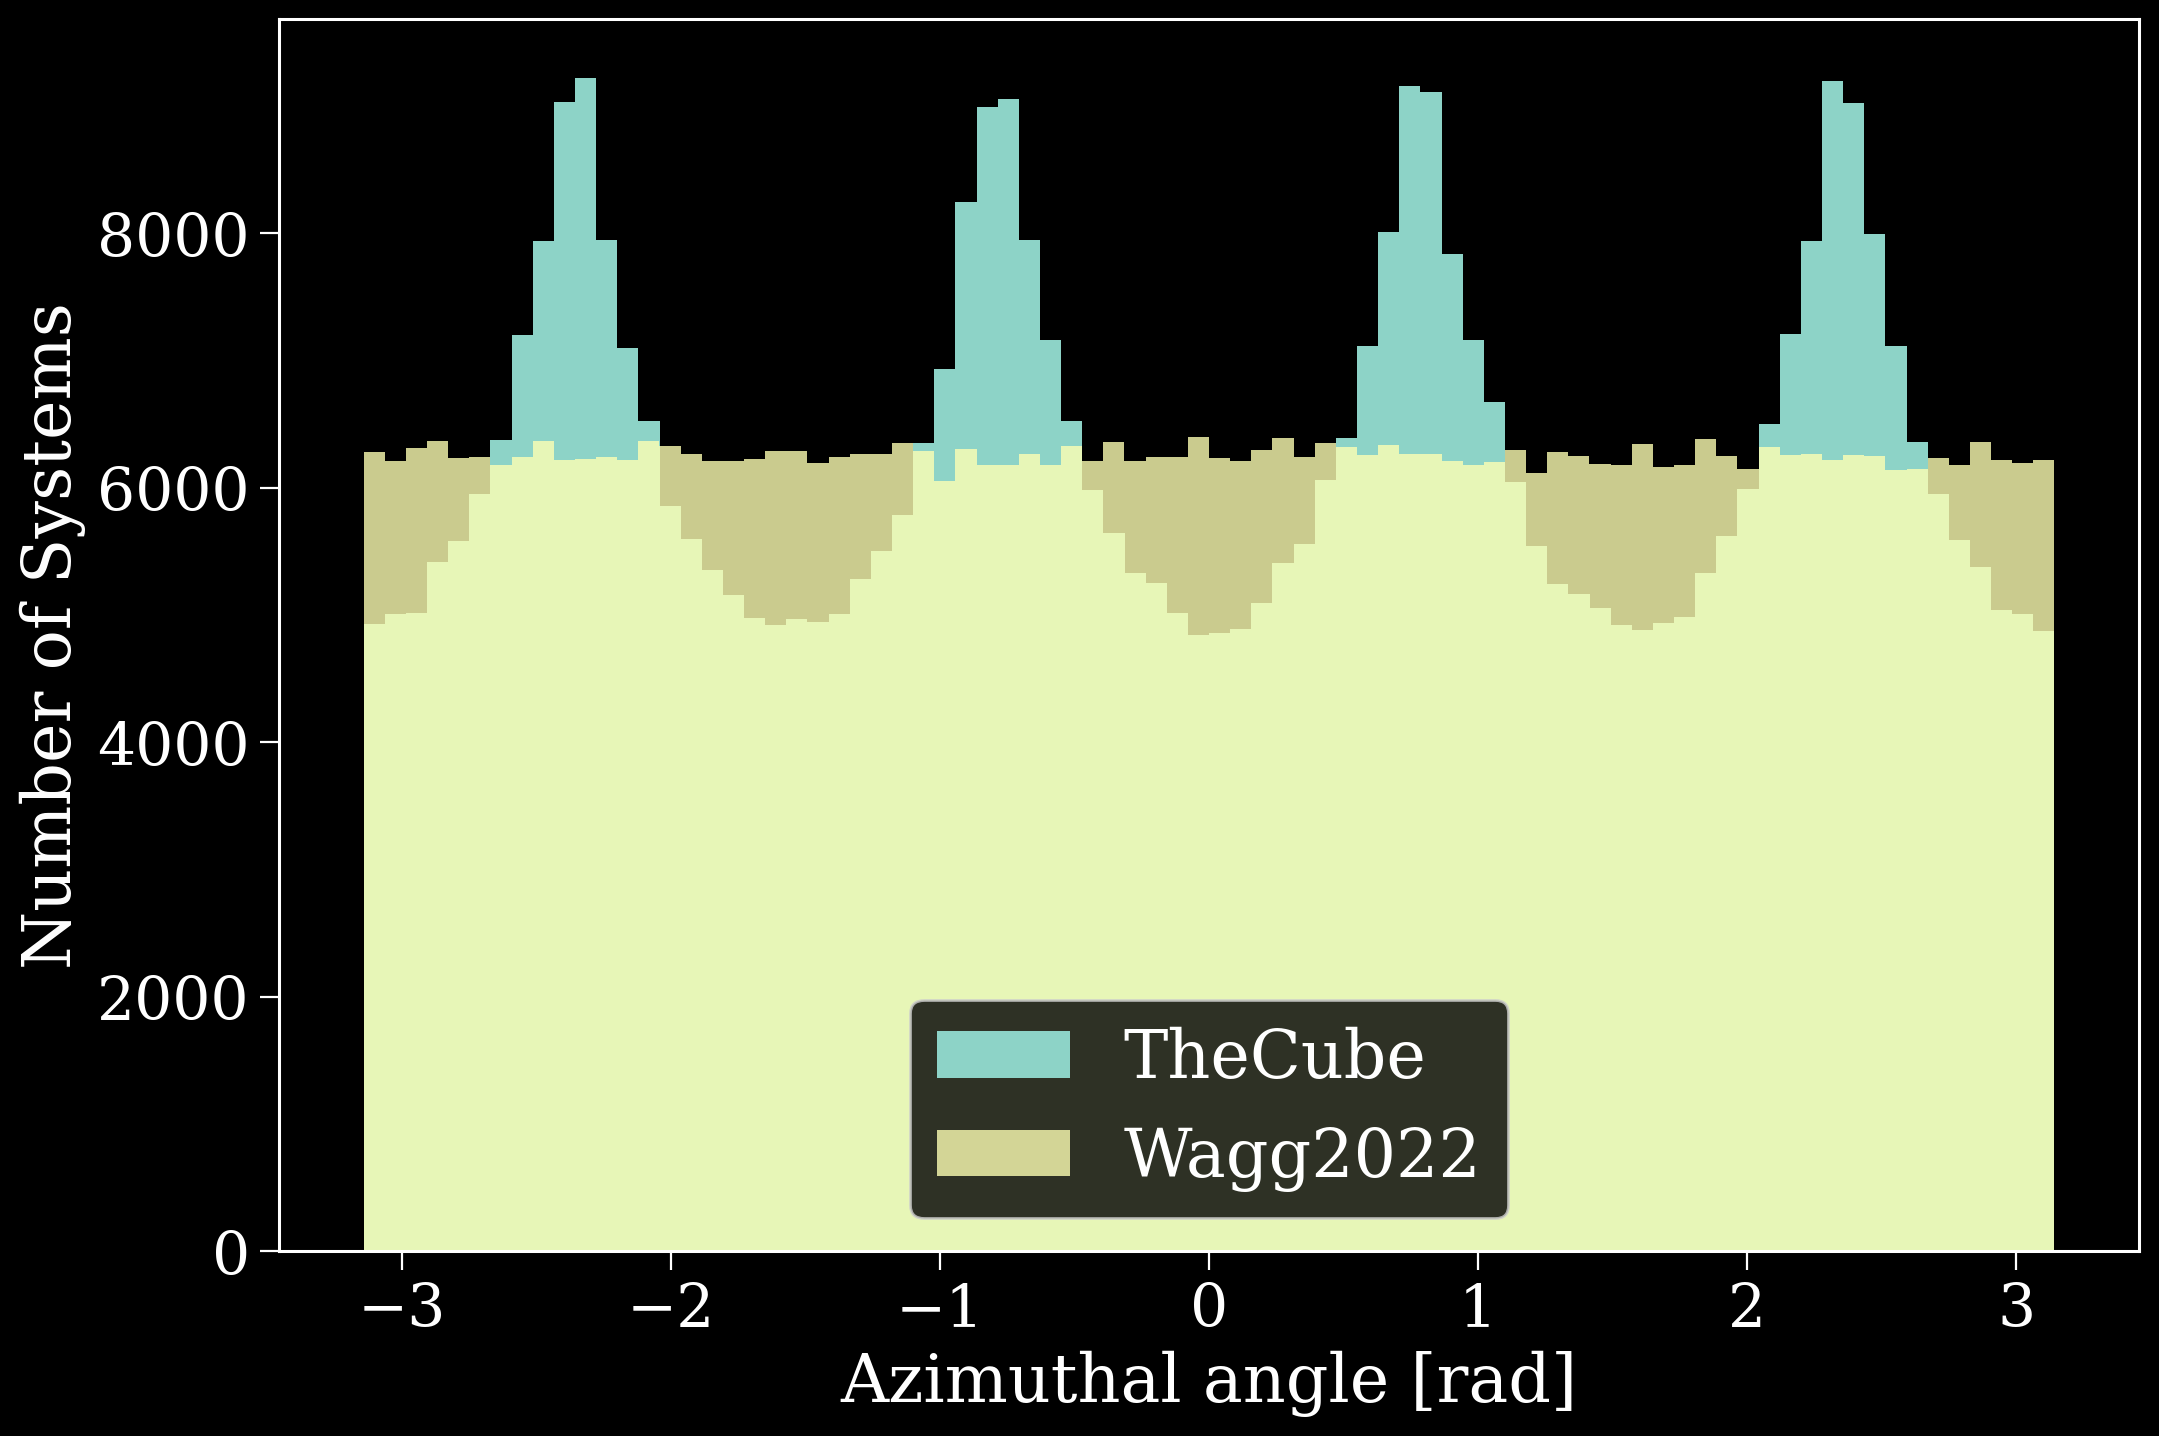

In [16]:
fig, ax = plt.subplots()
ax.hist(g_cube.phi.value, bins="fd", label="TheCube");
ax.hist(g.phi.value, bins="fd", alpha=0.8, label="Wagg2022");
ax.set(xlabel="Azimuthal angle [rad]", ylabel="Number of Systems")
ax.legend(loc="lower center")
plt.show()

In [17]:
p_fixed_Z = cogsworth.pop.Population(2000, sfh_model=FixedMetallicity,
                                     sfh_params={"fixed_Z": 0.02},
                                     use_default_BSE_settings=True)

In [18]:
p_fixed_Z.sample_initial_binaries()
p_fixed_Z._initial_binaries["metallicity"].values

array([0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02])

In [19]:
p_cube = cogsworth.pop.Population(1000, sfh_model=TheCube,
                                  use_default_BSE_settings=True)
p_cube.create_population()

# remove disrupted systems (they go to random locations)
# (you'll learn about masking like this in the next tutorial!)
p_cube = p_cube[~p_cube.disrupted]

Run for 1000 binaries
Ended up with 1002 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries


[0.3s] Evolve binaries (run COSMIC)


1006it [00:00, 2663.86it/s]                         


[0.6s] Get orbits (run gala)
Overall: 0.9s


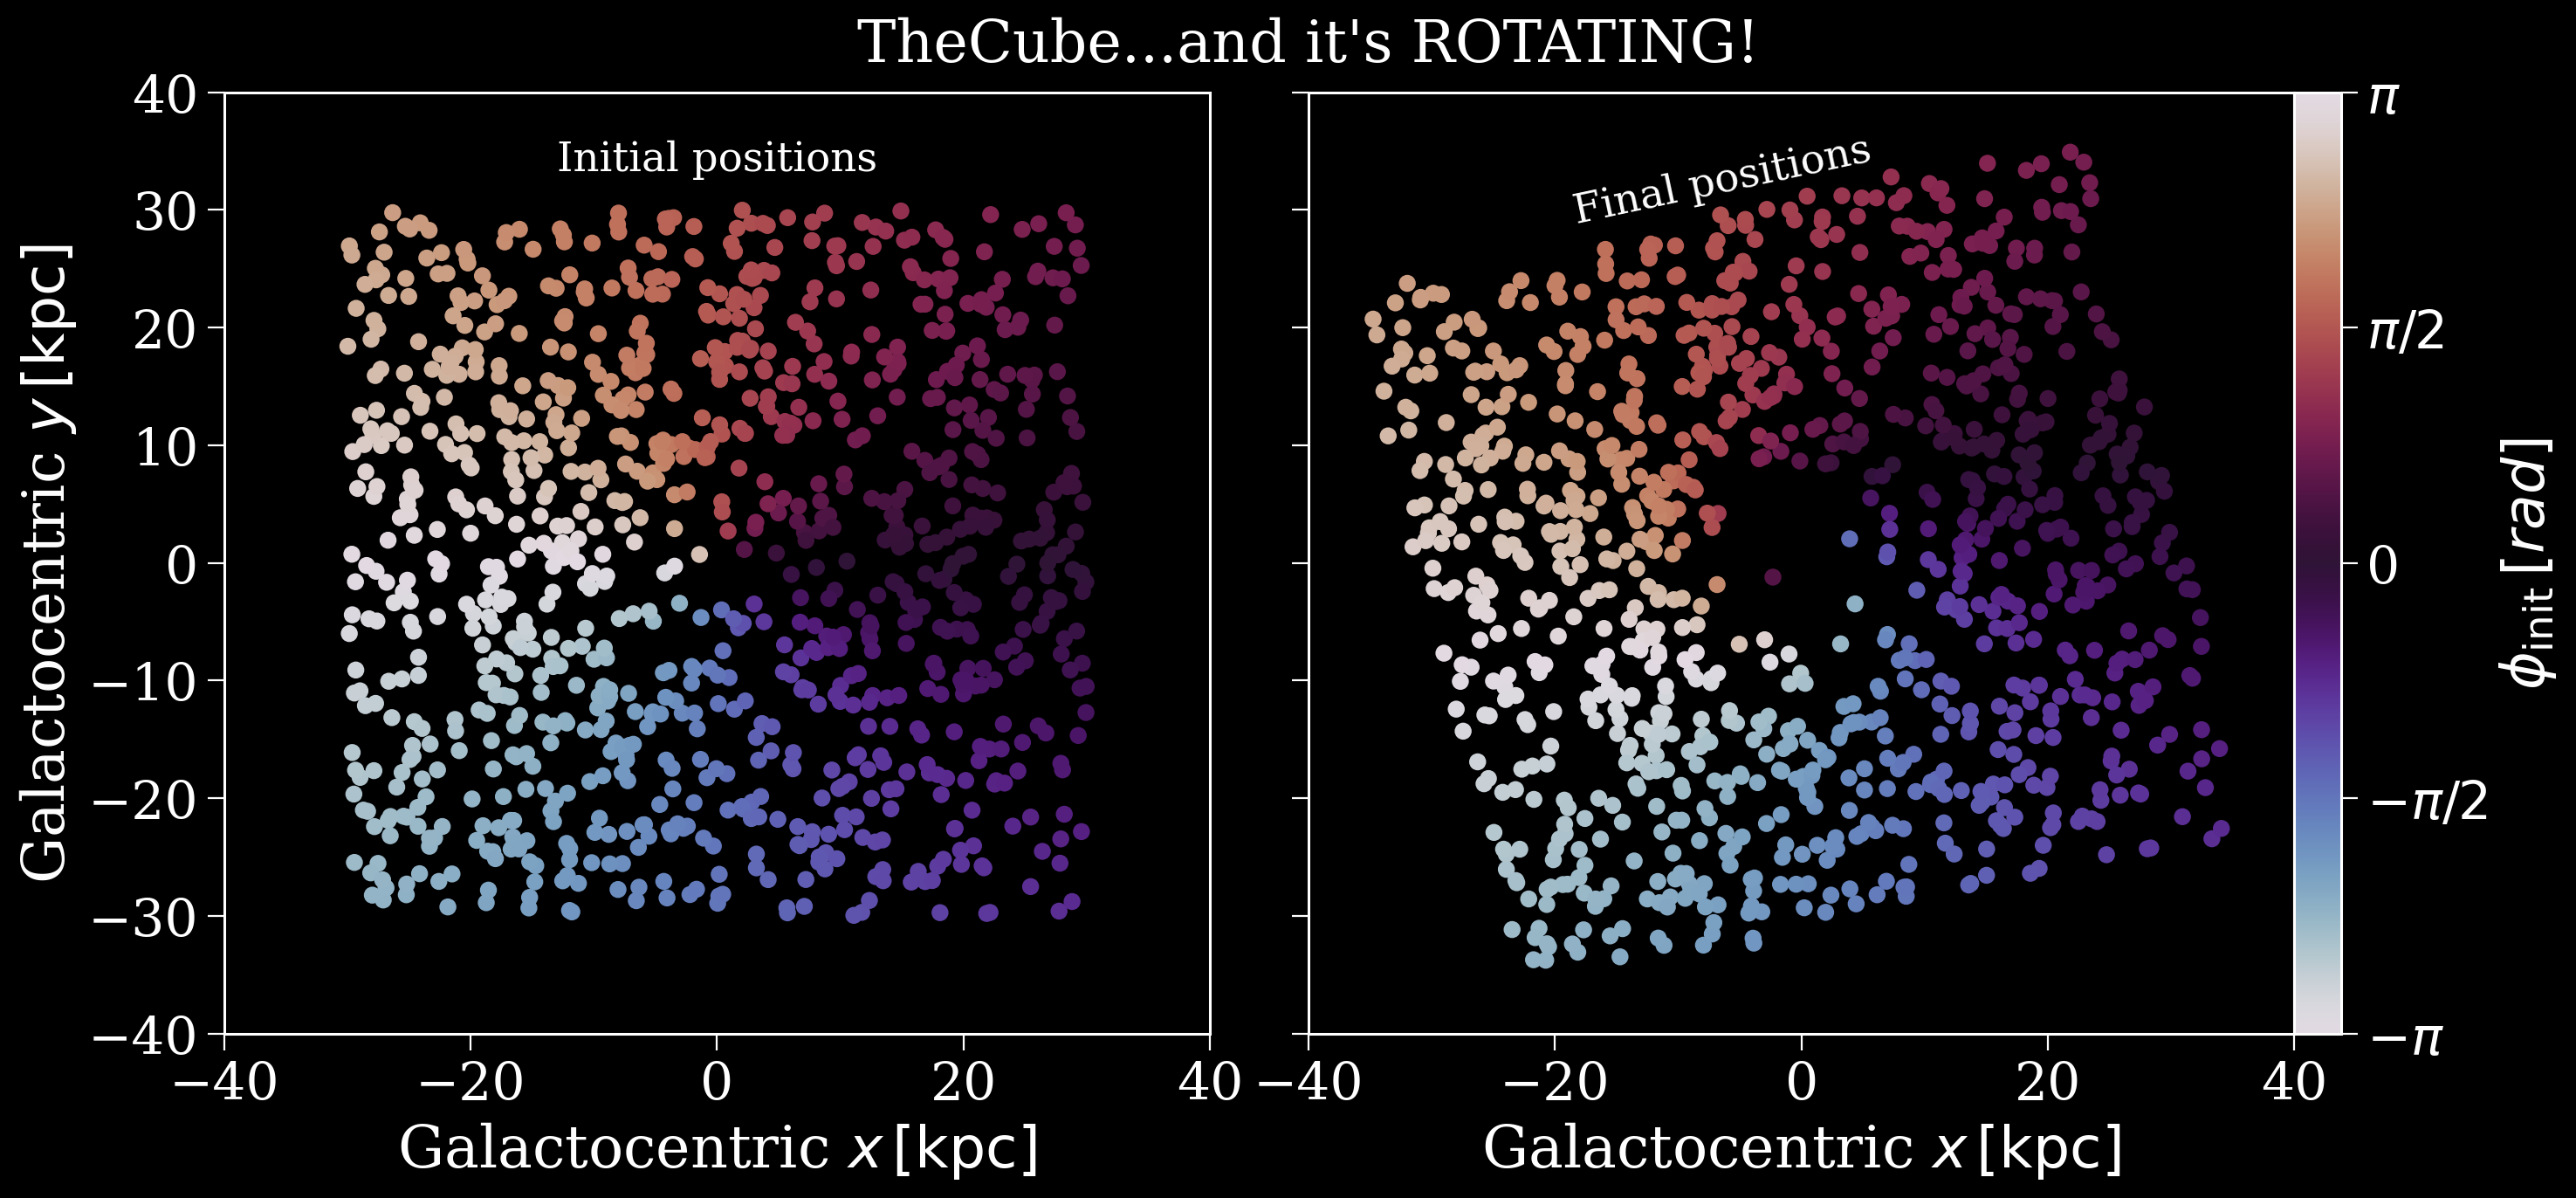

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.subplots_adjust(wspace=0.1)

scatter = axes[0].scatter(p_cube.initial_galaxy.x, p_cube.initial_galaxy.y,
                          c=p_cube.initial_galaxy.phi.value, cmap="twilight")

scatter = axes[1].scatter(p_cube.final_pos[:, 0], p_cube.final_pos[:, 1],
                          c=p_cube.initial_galaxy.phi.value, cmap="twilight")
cbar = fig.colorbar(scatter, label=r"$\phi_{\rm init} \, [rad]$", ax=axes, pad=0.0)
cbar.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
               labels=[r'$-\pi$', r'$-\pi / 2$', "0", r'$\pi / 2$', r'$\pi$'])

for ax in axes:
    ax.set(xlabel=r"Galactocentric $x \, [\rm kpc]$",
           xlim=(-40, 40), ylim=(-40, 40))
axes[0].set_ylabel(r"Galactocentric $y \, [\rm kpc]$")

axes[0].annotate("Initial positions", xy=(0.5, 0.95), xycoords="axes fraction",
                 ha="center", va="top", fontsize=0.7*fs)
axes[1].annotate("Final positions", xy=(0.42, 0.96), xycoords="axes fraction",
                 ha="center", va="top", fontsize=0.7*fs, rotation=12)

axes[1].annotate("TheCube...and it's ROTATING!", xy=(0, 1.05), xycoords="axes fraction",
                 ha="center", va="center", fontsize=fs)

plt.show()